Grafica PoS individual


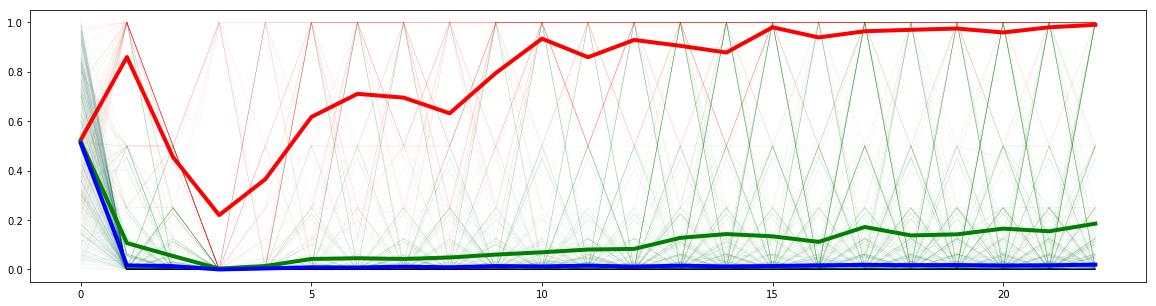

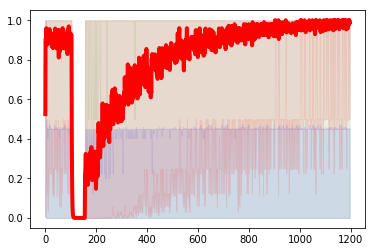

Grafica PoS media


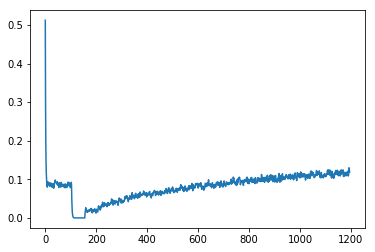

Grafica PoS media por grupos


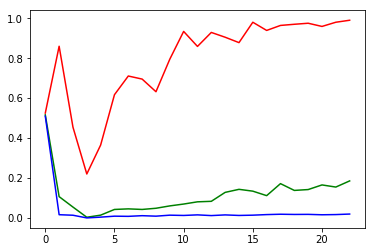

cantidad de pares de comunicacion


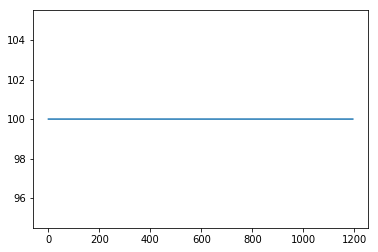

Porcentaje grupos con distinta media de crimen
[0.65 0.3  0.05]
Vector media de crimen por grupos
[0.  0.1 3.4]
velocidad de olvido
0.5
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
HOmofilia
0.533628762541806


In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 1000  # numero de personas
annos=23 ##23
T = annos*52  # numero de periodos años x 52 semanas
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.5  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 3  # cantidad de grupos con distinta tasa de crimen por periodo
kappa=np.concatenate((np.array([1,1]),np.linspace(0,2,int(T/52)-2)))#comienza en 0 y aumenta hasta 2
lamda = kappa[0]*np.array([0,0.05,1.7])  # tasas de crimen de los grupos
q = np.array([0.65, 0.3, 0.05])  # porcentajes de los grupos en la poblacion total

#identificacion de cada sujeto con su respectiva media de crimen 
for i in range(int(n*q[0])):
    g[i]=lamda[0]
for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
    g[i]=lamda[1]
for i in range(int(n*(q[0]+q[1])),n):
    g[i]=lamda[2]

# calculo de la Pos en el intante t
# en t=0 es s
St[0] = s
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
homofilia=np.zeros(T)
for t in range(1,T):
    #cambio de parametros lamba en el tiempo
    if t%52==0: #al pasar un año cambia k
        lamda = kappa[int(t/52)]*np.array([0,0.05,1.7])
        #identificacion de cada sujeto con su respectiva media de crimen 
        for i in range(int(n*q[0])):
            g[i]=lamda[0]
        for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
            g[i]=lamda[1]
        for i in range(int(n*(q[0]+q[1])),n):
            g[i]=lamda[2]
    # Al inicio de cada periodo aplicamos la perdida de memoria
    s = psi * s
    
    #pares de comunicacion 
    #vector de personas aleatoriamente ordenado 
    apersonas=np.random.permutation(np.arange(n))
    #escogemos 20%, 10% de cada extremo
    pares1=apersonas[:int(n*0.1)]
    pares2=apersonas[-int(n*0.1):]
    
    for k in range(len(pares1)):
        aux1=pares1[k]
        aux2=pares2[k]
        
        if s[aux1]<s[aux2]:
            s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
        else:
            s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])
        #medicion de la homofilia
        if g[aux1]==g[aux2]:
            homofilia[t]=homofilia[t]+1
    
    
    parescom[t]=len(pares1)
    homofilia[t]=homofilia[t]/parescom[t]    
    for k in range(n):
        # numero de crimenes sufridos por la persona k 
        X = np.random.poisson(g[k])
        # posicion hubo crimen o no
        I = 0
        if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
            I = 1
        # efecto del crimen en la percepcion de k para el siguiente periodo
        s[k] = I + (1 - I) * s[k]     
    St[t] = s
    
%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))],'green',linewidth=0.3,alpha=0.1)
plt.plot(St[::52,range(int(n*q[0]))],'blue',linewidth=0.3,alpha=0.01)
plt.plot(St[::52,range(int(n*q[0]+n*q[1]),n)],'red',linewidth=0.3,alpha=0.1)
plt.plot(np.mean(St[::52,range(int(n*q[0]+n*q[1]),n)],axis=1),'red',linewidth=4)
plt.plot(np.mean(St[::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green',linewidth=4)
plt.plot(np.mean(St[::52,range(int(n*q[0]))],axis=1),'blue',linewidth=4)
plt.show()
#maximo/minimo
x=np.arange(T)
minimo1=np.zeros(T)
maximo1=np.zeros(T)
minimo2=np.zeros(T)
maximo2=np.zeros(T)
minimo3=np.zeros(T)
maximo3=np.zeros(T)
for t in range(T):
    minimo1[t]=min(St[t,range(int(n*q[0]))])
    maximo1[t]=max(St[t,range(int(n*q[0]))]) 
    minimo2[t]=min(St[t,range(int(n*q[0]),int(n*q[0]+n*q[1]))])
    maximo2[t]=max(St[t,range(int(n*q[0]),int(n*q[0]+n*q[1]))])
    minimo3[t]=min(St[t,range(int(n*q[0]+n*q[1]),n)])
    maximo3[t]=max(St[t,range(int(n*q[0]+n*q[1]),n)]) 
plt.fill_between(x,minimo1,maximo1,color='blue',alpha=0.1)
plt.fill_between(x,minimo2,maximo2,color='green',alpha=0.1)
plt.fill_between(x,minimo3,maximo3,color='red',alpha=0.1)
plt.plot(np.mean(St[:,range(int(n*q[0]+n*q[1]),n)],axis=1),'red',linewidth=4)
#plt.plot(np.mean(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green',linewidth=4)
#plt.plot(np.mean(St[:,range(int(n*q[0]))],axis=1),'blue',linewidth=4)
plt.show()

print("Grafica PoS media")
plt.plot(np.mean(St,axis=1))
plt.show()
print("Grafica PoS media por grupos")
plt.plot(np.mean(St[::52,range(int(n*q[0]+n*q[1]),n)],axis=1),'red')
plt.plot(np.mean(St[::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green')
plt.plot(np.mean(St[::52,range(int(n*q[0]))],axis=1),'blue')
plt.show()

print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("HOmofilia")
print(np.mean(homofilia))
